<a href="https://colab.research.google.com/github/Mahya-gh/Persian-Characters-Recognition/blob/main/main_Easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. **Rotate**

In [ ]:
import tensorflow as tf
import os
import random
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from math import sqrt, atan, degrees
def find_longest_line(plate_img_gr):
    kernel_size = 3
    blur_gray = cv.GaussianBlur(plate_img_gr, (kernel_size, kernel_size), 0)

    low_threshold = 150
    high_threshold = 200

    edges = cv.Canny(blur_gray, low_threshold, high_threshold)

    rho = 1  # distance resolution in pixels of the Hough grid
    theta = np.pi / 180  # angular resolution in radians of the Hough grid
    threshold = 15  # minimum number of votes (intersections in Hough grid cell)
    min_line_length = 50  # minimum number of pixels making up a line
    max_line_gap = 5  # maximum gap in pixels between connectable line segments
    line_image = np.copy(plate_img_gr) * 0  # creating a blank to draw lines on

    # Run Hough on edge detected image
    # Output "lines" is an array containing endpoints of detected line segments
    lines = cv.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

    lls = []
    for indx, line in enumerate(lines):
        for x1,y1,x2,y2 in line:
            cv.line(line_image,(x1,y1),(x2,y2),(255,0,0),5)
            line_length = sqrt((x2-x1)**2 + (y2-y1)**2)
            lls.append((indx,line_length))
    lls.sort(key = lambda x: x[1])
    linessorted = []
    for (indx,ll) in lls:
        linessorted.append(lines[indx])
    return linessorted

def find_line_angle(line):
    x1,y1,x2,y2 = line[0]
    angle = degrees(atan(((y2-y1)/(x2-x1))))
    return angle

def rotate_image(plate_img_gr, angle):
    plate_img_gr = cv.cvtColor(plate_img_gr, cv.COLOR_BGR2GRAY) # Convert to grayscale
    (h, w) = plate_img_gr.shape
    (cX, cY) = (w // 2, h // 2)
    M = cv.getRotationMatrix2D((cX, cY), angle, 1.0)
    rotated = cv.warpAffine(plate_img_gr, M, (w, h))
    return rotated


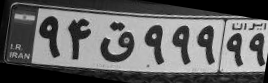

In [ ]:
detected_plate_image = cv.imread('/content/drive/MyDrive/image.jpg")
linessorted = find_longest_line(detected_plate_image)
rot_angle = find_line_angle(linessorted[-1])
rotated_img = rotate_image(detected_plate_image, rot_angle)
cw = rotated_img.shape[1]

cv2_imshow(rotated_img)

# 2. **Preprocessing**

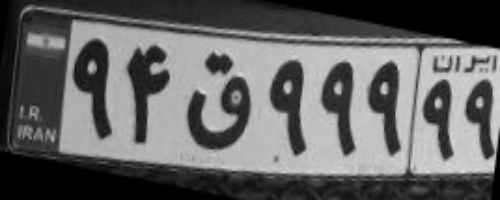

In [ ]:
# resize
import cv2
resize_image = cv2.resize(rotated_img, (500 ,200), interpolation=cv2.INTER_LINEAR)  #(500 ,200)
cv2_imshow(resize_image)

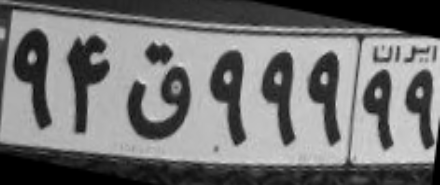

In [ ]:
hights = resize_image.shape[0]
width = resize_image.shape[1]
number_plate_img = resize_image[10:hights-5 , 60:width ]
cv2_imshow(number_plate_img)

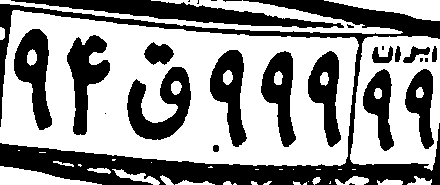

In [ ]:
#binarization
thresh_image = cv2.adaptiveThreshold(number_plate_img , 255 , cv2.ADAPTIVE_THRESH_MEAN_C , cv2.THRESH_BINARY , 35 , 5)
cv2_imshow(thresh_image)

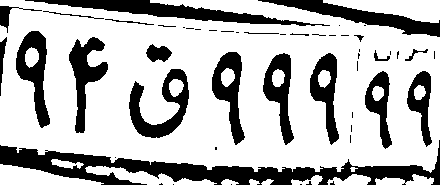

In [ ]:
#morphology
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS , (5,5) , (3,3))
erode_image = cv2.erode(thresh_image, kernel , iterations=1)
erode_image = cv2.dilate(thresh_image, kernel , iterations=1)

cv2_imshow(erode_image)

# 3. **Recognize Text**

In [ ]:
pip install easyocr

In [ ]:
import easyocr
reader = easyocr.Reader(['fa'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.10/dist-packages/easyocr/detection.py:78: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(copyStateDict(torch.load(trained_model, ma

3.1 s

In [ ]:
plate_info =reader.readtext(erode_image)
plate_text = plate_info[0][-2]
print( plate_text)

٦٩ ٩٩٩ق٩٤
